Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## reading and displaying the data
stud_data = pd.read_csv('C://Assignment/Likert Scale Ratings.csv') 
stud_data.head()

,Pleasantness Ratings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,-1,2,-1,-1,2,-1,-1,-1,4,-2,...,0,-1,1,-4,-1,2,1,-2,4,-3
1,-1,-3,-2,-2,-2,-3,-3,-4,-4,-2,...,-1,-2,-2,-1,-1,-4,-1,-4,-1,-4
2,-1,2,3,1,-2,0,-1,-1,2,-1,...,0,0,2,-1,2,-1,0,3,4,-1
3,-1,3,1,-1,-1,-2,-1,-1,-4,-2,...,0,0,1,-1,1,-1,-1,1,1,-3
4,-1,-2,3,-1,0,1,-1,1,-2,1,...,0,-1,2,1,2,-2,1,2,3,3


In [3]:
## total rows and columns in our dataset
stud_data.shape

(110, 30)

In [16]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [17]:
cronbach_alpha(stud_data)

0.9556464886481948

In [28]:
q1,q3 = np.percentile(stud_data, [25, 75])
print(q1,q3)

-1.0 2.0


In [32]:
iqr = q3- q1 
iqr

3.0

In [33]:
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
print(lower_fence,upper_fence)

-5.5 6.5


In [56]:

def remove_outliers(stud_data):

    low = 0.05
    high = .95

    quant_df = stud_data.quantile([low, high])

    for name in list(stud_data.columns):
        
        stud_data= stud_data[(stud_data[name]> quant_df.loc[low,name]) & (stud_data[name]< quant_df.loc[high, name])]

    return stud_data

remove_outliers(stud_data)

,Pleasantness Ratings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29


In [ ]:
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

In [45]:
cronbach_alpha(stud_data)

0.9556464886481948

In [22]:

from pandas.api.types import is_numeric_dtype

np.random.seed(42)
age = np.random.randint(20,100,50)
name = ['name'+str(i) for i in range(50)]
address = ['address'+str(i) for i in range(50)]

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

remove_outlier(stud_data).head()

,Pleasantness Ratings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29


In [23]:
cronbach_alpha(stud_data)

0.9556464886481948

In [4]:
## let us start by looking at descriptive statistic parameters for the dataset
stud_data.describe(include='all')

,Pleasantness Ratings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,-1.081818,0.318182,0.490909,0.509091,0.072727,0.154545,-1.481818,-0.218182,1.718182,0.145455,...,0.427273,-0.645455,0.363636,0.345455,1.381818,-0.054545,0.345455,-0.554545,2.309091,-0.236364
std,0.779694,2.643780,2.053171,1.601292,1.304256,2.090548,1.831086,2.185783,2.995813,2.365022,...,1.371125,1.303393,1.855946,1.705019,1.723991,2.216851,1.492712,2.309082,1.851087,2.729140
min,-4.000000,-4.000000,-4.000000,-3.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-2.000000,-3.000000,-3.000000,-4.000000,-3.000000,-4.000000,-3.000000,-4.000000,-3.000000,-4.000000
25%,-1.000000,-2.000000,-1.000000,-1.000000,-0.750000,-1.000000,-3.000000,-2.000000,-0.500000,-2.000000,...,-1.000000,-2.000000,-1.000000,-1.000000,0.000000,-2.000000,-1.000000,-2.000000,2.000000,-2.000000
50%,-1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,-2.000000,-0.500000,3.000000,1.000000,...,0.000000,-1.000000,1.000000,1.000000,2.000000,0.000000,0.500000,-1.000000,3.000000,-1.000000
75%,-1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,-1.000000,1.000000,4.000000,2.000000,...,2.000000,0.000000,2.000000,1.750000,3.000000,2.000000,1.000000,1.000000,4.000000,2.000000
max,1.000000,4.000000,4.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,4.000000,...,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000


## Broad idea about our dataset is ::
    1. For numerical parameters, fields like mean, standard deviation, percentiles, and  maximum have been populated. 
    2. For categorical features, count, unique, top (most frequent value), and    corresponding frequency have been populated

## 1. Missing values

In [5]:
## checking for presence of null/nan values in the dataset
# stud_data.isnull().sum()

<AxesSubplot:>

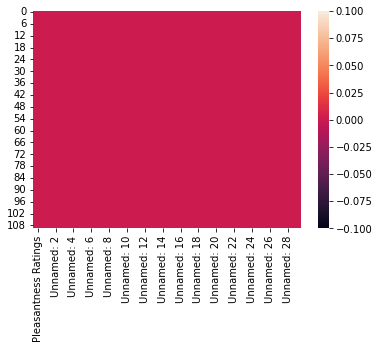

In [19]:
## Diagrammatic Approach for - checking for presence of null/nan values in the dataset
# plt.figure(figsize=(10,10))
sns.heatmap(stud_data.isnull())

Fortunately for us, there are no missing values in this dataset

## 2. Checking the Distribution for categorical features

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '-1'),
  Text(4, 0, '-2'),
  Text(5, 0, '3'),
  Text(6, 0, '-3'),
  Text(7, 0, '-4')])

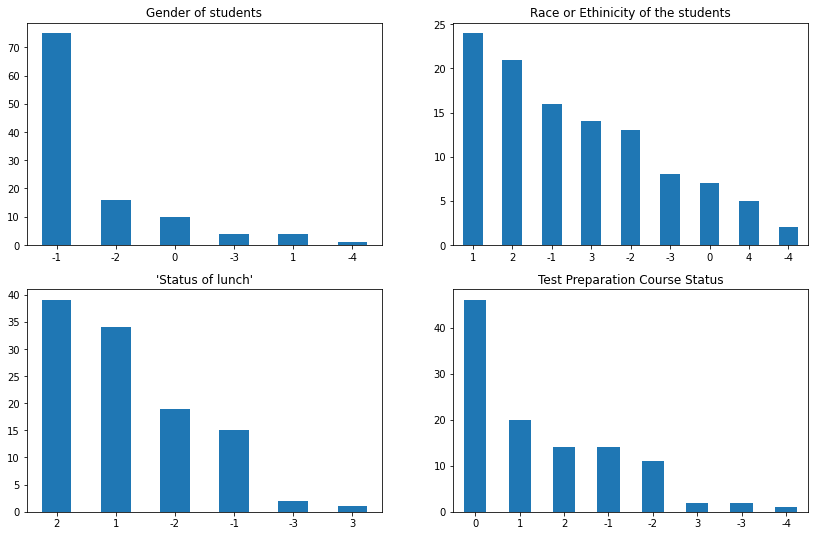

In [8]:
## Univariate Analysis using Barplot - look at the distribution of students across
## 1. gender
## 2. race/ethnicity
## 3. their lunch status, 
## 4. whether they have a test preparation course or not.

plt.subplot(221)
stud_data['Pleasantness Ratings'].value_counts().plot(kind='bar',title='Gender of students',figsize=(14,9))
plt.xticks(rotation=0)

plt.subplot(222)
stud_data['Unnamed: 2'].value_counts().plot(kind='bar',title='Race or Ethinicity of the students')
plt.xticks(rotation=0)

plt.subplot(223)
stud_data['Unnamed: 3'].value_counts().plot(kind='bar',title="'Status of lunch'")
plt.xticks(rotation=0)

plt.subplot(224)
stud_data['Unnamed: 4'].value_counts().plot(kind='bar',title='Test Preparation Course Status')
plt.xticks(rotation=0)

## Following inferences can be made from these plots/distribution ::
     1. There are more girls in the school than boys. 
     2. The majority of the students belong to groups C and D. 
     3. More than 60% of the students have a standard lunch at school. 
     4. Also, more than 60% of students have not taken any test preparation course.

## 3. Checking the distribution for numerical features

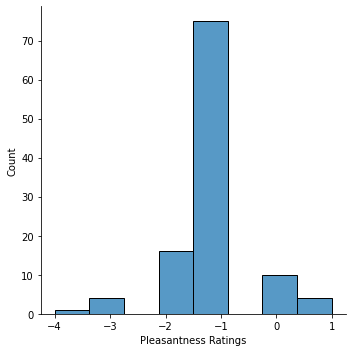

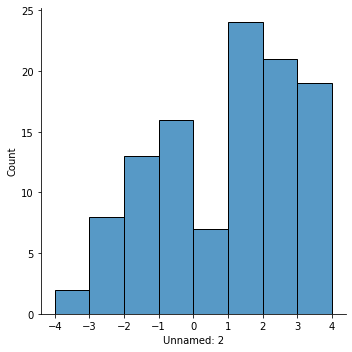

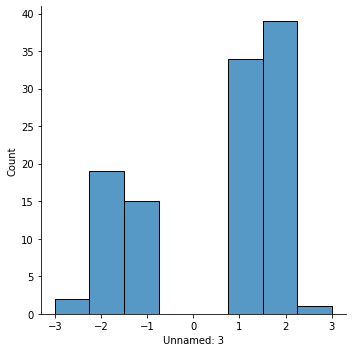

In [9]:
sns.displot(stud_data['Pleasantness Ratings'])
sns.displot(stud_data['Unnamed: 2'])
sns.displot(stud_data['Unnamed: 3'])

## to get all three graphs inside one use sns,distplot() method as shown below:
##sns.distplot(stud_data['math score'])
##sns.distplot(stud_data['reading score'])
##sns.distplot(stud_data['writing score'])

These graphs represents a perfect bell curve(Normal Distribution) closely. 

## 4. Outliers detection - using boxplot()

<AxesSubplot:>

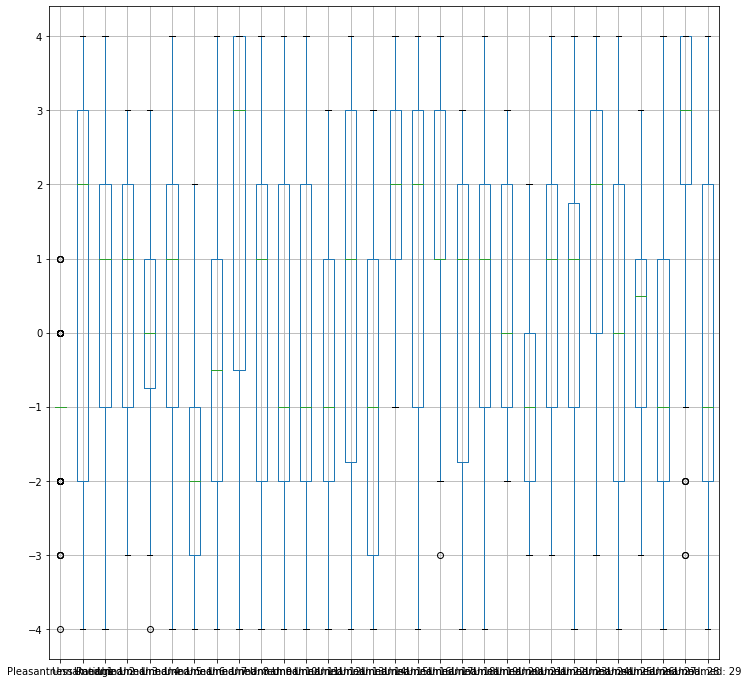

In [10]:
##A boxplot helps us in visualizing the data in terms of quartiles. 
## It also identifies outliers in the dataset, if any.

plt.figure(figsize=(12,12))
stud_data.boxplot()

These bottom circles shows that all three subject have outliers(at the bottom-side) but since its easily possible that students can get very low marks so we are not going to remove these outliers

## 5. Relationship among numerical features

In [ ]:
correlation = stud_data.corr()
correlation

In [3]:
## heatmap for the correlation
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True,square=True)
plt.yticks(rotation=0)
plt.show()

NameError: name 'correlation' is not defined

<Figure size 1440x1440 with 0 Axes>

In [13]:
def svar(X):
    n = float(len(X))
    svar=(sum([(x-np.mean(X))**2 for x in X]) / n)* n/(n-1.)
    return svar

def CronbachAlpha2(itemscores):
    itemvars = [svar(item) for item in itemscores]
    tscores = [0] * len(itemscores[0])
    for item in itemscores:
       for i in range(len(item)):
          tscores[i]+= item[i]
    nitems = len(itemscores)
    #print "total scores=", tscores, 'number of items=', nitems

    Calpha=nitems/(nitems-1.) * (1-sum(itemvars)/ svar(tscores))

    return Calpha

In [14]:
CronbachAlpha2([stud_data['Unnamed: 2'],stud_data['Unnamed: 3'],stud_data['Unnamed: 4'],stud_data['Unnamed: 1'],stud_data['Unnamed: 5'],stud_data['Unnamed: 6'],stud_data['Pleasantness Ratings'],stud_data['Unnamed: 7'],stud_data['Unnamed: 8'],stud_data['Unnamed: 9'],stud_data['Unnamed: 10'],stud_data['Unnamed: 11'],stud_data['Unnamed: 12'],stud_data['Unnamed: 13'],stud_data['Unnamed: 14'],stud_data['Unnamed: 15'],stud_data['Unnamed: 16'],stud_data['Unnamed: 17'],stud_data['Unnamed: 18'],stud_data['Unnamed: 19'],stud_data['Unnamed: 20'],stud_data['Unnamed: 21'],stud_data['Unnamed: 22'],stud_data['Unnamed: 23'],stud_data['Unnamed: 24'],stud_data['Unnamed: 25'],stud_data['Unnamed: 26'],stud_data['Unnamed: 27'],stud_data['Unnamed: 28'],stud_data['Unnamed: 29']])

0.9537318516391181

## 6. Relationship across features(i.e. with each other) 

<Figure size 864x864 with 0 Axes>

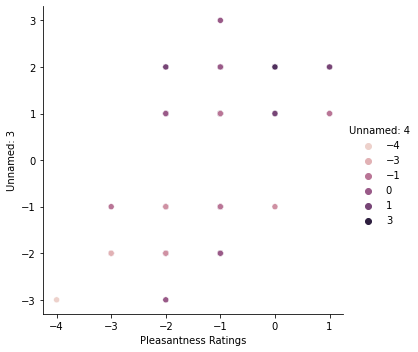

In [15]:
## Bivariate analysis - using relational plot
## Relationship between the math score and the writing score of different genders.

plt.figure(figsize=(12,12))
sns.relplot(x='Pleasantness Ratings',y='Unnamed: 3',hue='Unnamed: 4',data=stud_data)
# plt.show()

1. female students are more likely to have a higher writing score than male students.
2. male students are expected to have a higher math score than female students.

## Analyzing Students performance

<AxesSubplot:>

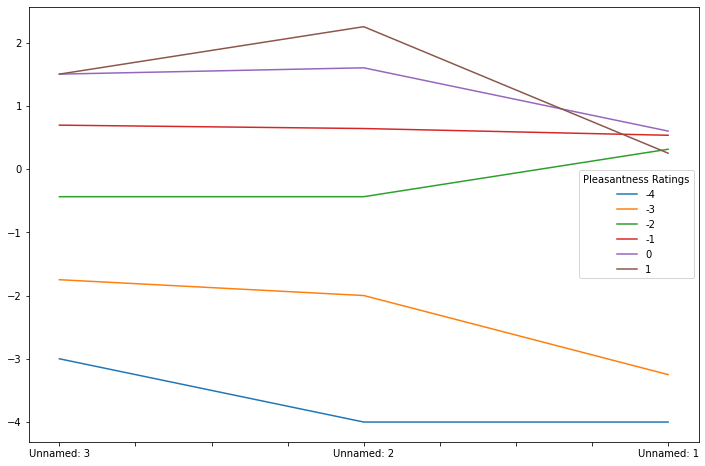

In [31]:
## let us have a look at the impact of parents’ level of education 
## on their child’s performance in school using a line plot.

## LINE plot
stud_data.groupby('Pleasantness Ratings')[['Unnamed: 3','Unnamed: 2','Unnamed: 1']].mean().T.plot(figsize=(12,8))

It is very clear from this graph that students whose parents are more educated than others (master’s degree, bachelor’s degree, and associate’s degree) are performing better on average than students whose parents are less educated (high school). This can be a genetic difference, or simply a difference in the students’ environment at home. More educated parents are more likely to push their students towards studies

<AxesSubplot:>

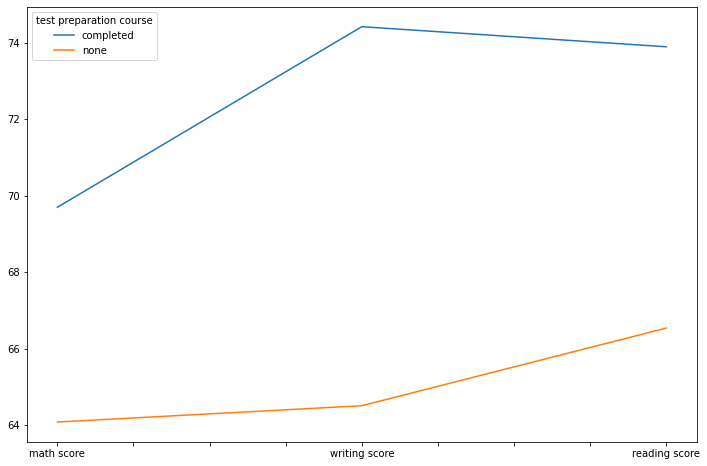

In [72]:
## impact of the test preparation course on performance using a line plot
stud_data.groupby('test preparation course')[['math score','writing score','reading score']].mean().T.plot(figsize=(12,8))

<AxesSubplot:>

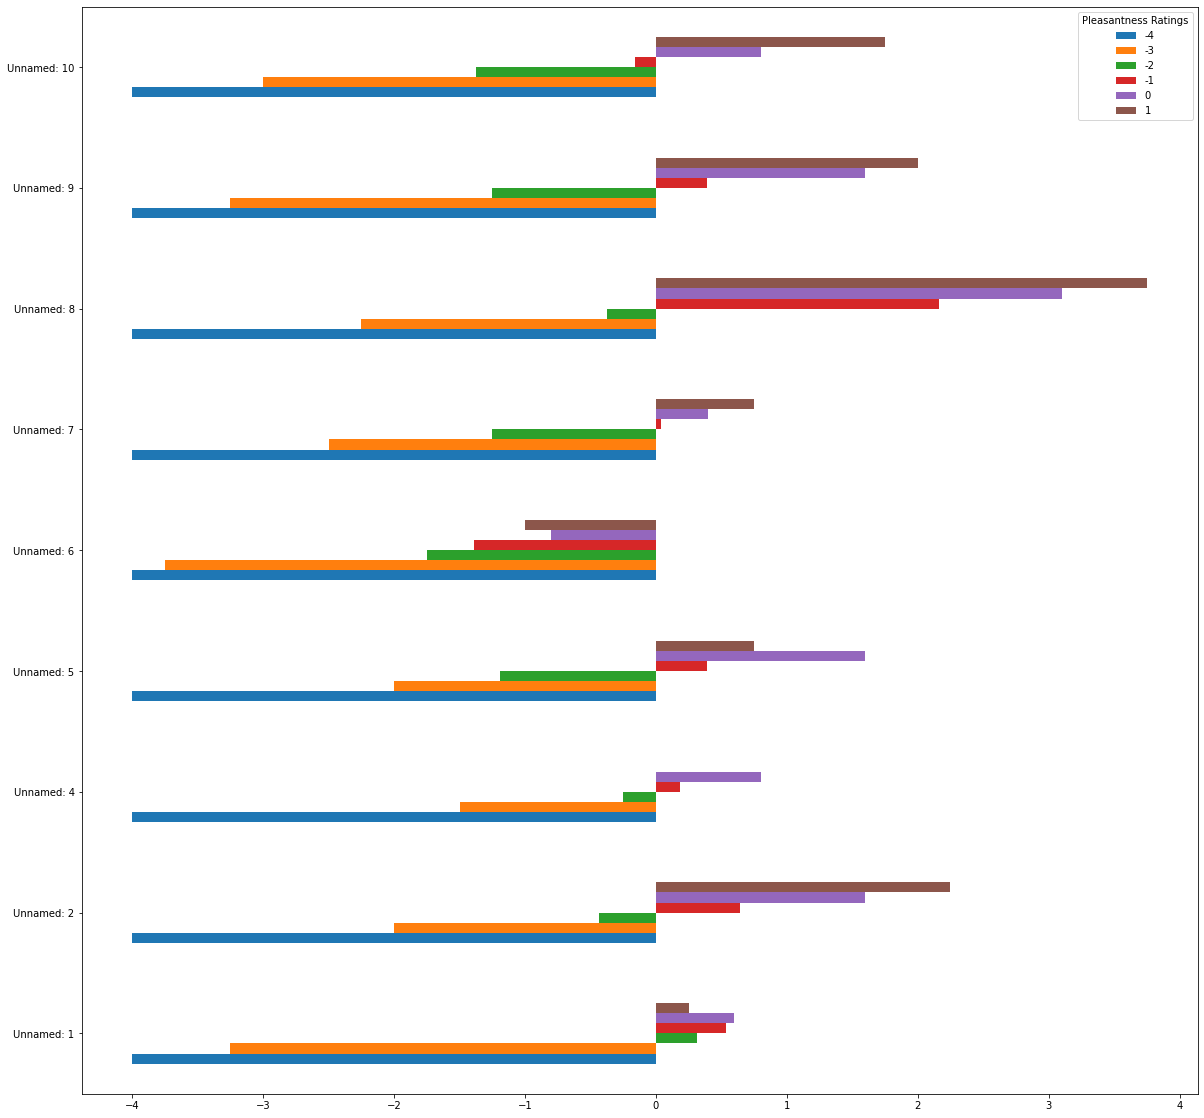

In [45]:
## impact of the test preparation course on performance using a horizontal bar graph

stud_data.groupby('Pleasantness Ratings')[['Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10']].mean().T.plot(kind='barh',figsize=(20,20))

It is very clear that students who have completed the test preparation course have performed better, on average, as compared to students who have not opted for the course.